# Task 1
5390<br>
Elaina Rohlfing


Ran into issues with initial dataset choice (political_memes, training was stuck at baseline). So I used bears dataset instead, but unfortunately I ran short on time. Notebook may be incomplete.

## Load the data
* Upload & unzip the dataset
* Load training and validation images
* Combine images into single folder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# will have to figure out how to upload from http
#! wget https://github.com/LainaVS/deep-learning/blob/main/political_memes.zip

In [ ]:
#! unzip /content/political_memes.zip
#! unzip /content/bears_ws.zip
! unzip "/content/drive/MyDrive/Colab Notebooks/bears_ws.zip"

Archive:  /content/drive/MyDrive/Colab Notebooks/bears_ws.zip
   creating: bears/
  inflating: bears/.DS_Store         
  inflating: __MACOSX/bears/._.DS_Store  
   creating: bears/test/
   creating: bears/training/
   creating: bears/validation/
   creating: bears/test/polar/
  inflating: bears/test/.DS_Store    
  inflating: __MACOSX/bears/test/._.DS_Store  
   creating: bears/test/panda/
   creating: bears/test/grizzly/
   creating: bears/training/polar/
  inflating: bears/training/.DS_Store  
  inflating: __MACOSX/bears/training/._.DS_Store  
   creating: bears/training/panda/
   creating: bears/training/grizzly/
   creating: bears/validation/polar/
  inflating: bears/validation/.DS_Store  
  inflating: __MACOSX/bears/validation/._.DS_Store  
   creating: bears/validation/panda/
   creating: bears/validation/grizzly/
  inflating: bears/test/polar/polar_1198.jpg  
  inflating: bears/test/polar/polar_1167.jpg  
  inflating: bears/test/polar/polar_1359.jpg  
  inflating: bears/test/po

In [ ]:
! ls -l

total 16
drwxr-xr-x 5 root root 4096 Dec 15  2022 bears
drwx------ 6 root root 4096 Apr 18 22:31 drive
drwxr-xr-x 3 root root 4096 Apr 18 22:31 __MACOSX
drwxr-xr-x 1 root root 4096 Apr 17 13:29 sample_data


In [ ]:
#! ls -l "/content/Political Meme Dataset/"
! ls -l "/content/bears"

total 12
drwxr-xr-x 5 root root 4096 Dec 15  2022 test
drwxr-xr-x 5 root root 4096 Dec 15  2022 training
drwxr-xr-x 5 root root 4096 Dec 15  2022 validation


In [ ]:
#!ls -l "/content/Political Meme Dataset/validation"
! mkdir "/content/bears/combined"
! ls -l "/content/bears"

total 16
drwxr-xr-x 2 root root 4096 Apr 19 15:07 combined
drwxr-xr-x 5 root root 4096 Dec 15  2022 test
drwxr-xr-x 5 root root 4096 Dec 15  2022 training
drwxr-xr-x 5 root root 4096 Dec 15  2022 validation


In [ ]:
# combine training and validation into a single set for overfitting
! cp -r "/content/bears/training/"* "/content/bears/combined/"
! cp -r "/content/bears/validation/"* "/content/bears/combined/"
! ls -l "/content/bears/combined"

total 36
drwxr-xr-x 2 root root 12288 Apr 19 15:07 grizzly
drwxr-xr-x 2 root root 12288 Apr 19 15:07 panda
drwxr-xr-x 2 root root 12288 Apr 19 15:07 polar


## Prepare the images

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Rescale all images by 1./255
my_generator = ImageDataGenerator(rescale=1./255)

In [ ]:
train = my_generator.flow_from_directory( "/content/bears/combined", \
                                         target_size=(64,64), shuffle=True, \
                                          batch_size=16)

Found 958 images belonging to 3 classes.


In [ ]:
print(f'{train.class_indices=}')
#print(f'{train.num_classes=}')
#print(f'{train.batch_size=}')
#print(f'{train.samples=}')
#print(f'{train.image_shape=}')

train.class_indices={'grizzly': 0, 'panda': 1, 'polar': 2}


Display one image and its label

In [ ]:
import matplotlib.pyplot as plt
# Take one batch full of images
def display_image(dataset):
    images, labels = dataset[0]
    print(images.shape)
    #print(labels)
    plt.imshow(images[0])
    plt.title(f"{str(labels[0])}") # add name of label train_ds.class_indices
    plt.axis("off")

(16, 64, 64, 3)


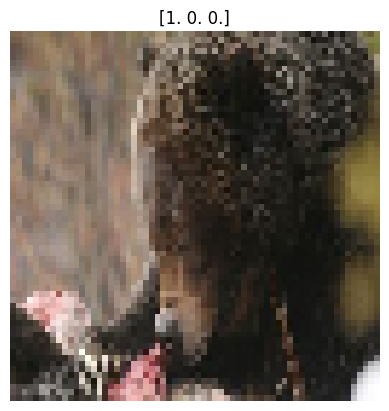

In [ ]:
display_image(train)

## Build the smallest possible model
Smallest is defined as least parameters needed to achieve our goal of overfitting. Be careful, parameters should be concentrated in convolutional layers, not the dense layers.

In [ ]:
from tensorflow.keras import datasets, layers, models
num_filters = [64, 32, 16]
filter_shape = (3, 3)
inputshape = (64, 64, 3)
pad = 'valid'
pool = (4, 4)


# convolutional base
model = models.Sequential()
model.add(layers.Conv2D(num_filters[0], kernel_size=filter_shape, activation='relu', padding=pad, input_shape=inputshape, name="first_layer_conv"))
model.add(layers.MaxPooling2D(pool_size=pool, padding=pad, name="first_layer_pool"))

model.add(layers.Conv2D(num_filters[1], kernel_size=filter_shape, activation='relu', padding=pad, input_shape=inputshape))
model.add(layers.MaxPooling2D(pool_size=pool, padding=pad))

model.add(layers.Conv2D(num_filters[2], kernel_size=filter_shape, activation='relu', padding=pad, input_shape=inputshape))

# add dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

## Inspect the model

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_layer_conv (Conv2D)   (None, 62, 62, 64)        1792      
                                                                 
 first_layer_pool (MaxPooli  (None, 15, 15, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 3, 3, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 1, 1, 16)          4624      
                                                                 
 flatten_1 (Flatten)         (None, 16)               

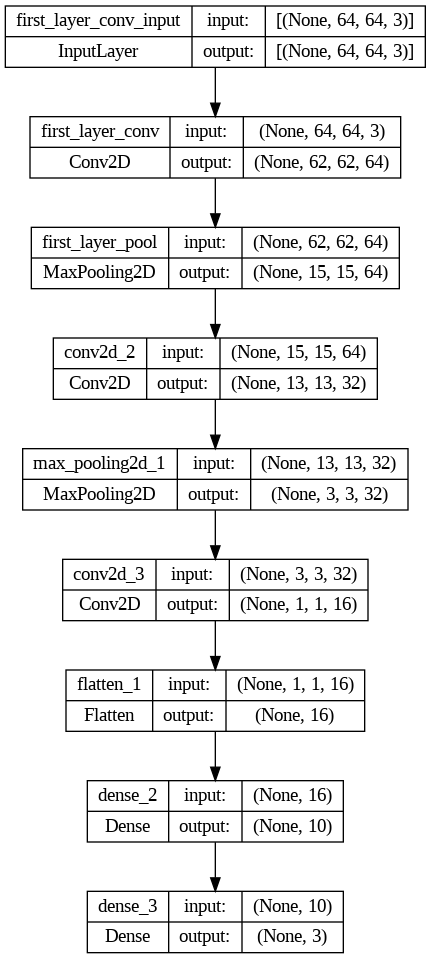

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_layer_names=True, show_shapes=True)

## Compile the model to check for errors & Train

In [ ]:
model.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint_filepath = '/content/drive/MyDrive/Colab Notebooks/tmp-models/chkpt.overfit.model2.hg5'
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath, monitor='accuracy', mode='max', save_best_only=True)

early_stop_callback = EarlyStopping(monitor="accuracy", patience=15, verbose=1)


In [ ]:
history = model.fit(train, epochs=200, callbacks=[checkpoint_callback, early_stop_callback], verbose=1)

Epoch 1/200
60/60 [==============================] - 4s 52ms/step - loss: 0.9677 - accuracy: 0.5136
Epoch 2/200
60/60 [==============================] - 3s 57ms/step - loss: 0.7175 - accuracy: 0.7015
Epoch 3/200
60/60 [==============================] - 3s 52ms/step - loss: 0.6025 - accuracy: 0.7380
Epoch 4/200
60/60 [==============================] - 3s 54ms/step - loss: 0.5292 - accuracy: 0.7787
Epoch 5/200
60/60 [==============================] - 3s 52ms/step - loss: 0.4687 - accuracy: 0.8079
Epoch 6/200
60/60 [==============================] - 3s 52ms/step - loss: 0.4225 - accuracy: 0.8330
Epoch 7/200
60/60 [==============================] - 3s 52ms/step - loss: 0.3991 - accuracy: 0.8486
Epoch 8/200
60/60 [==============================] - 3s 52ms/step - loss: 0.3780 - accuracy: 0.8549
Epoch 9/200
60/60 [==============================] - 3s 51ms/step - loss: 0.3395 - accuracy: 0.8727
Epoch 10/200
60/60 [==============================] - 3s 57ms/step - loss: 0.3107 - accuracy: 0.8873

## Investigate learning curves
Look back and investigate the training by comparing the accuracy on the training dataset and validation dataset

In [ ]:
import matplotlib.pyplot as plt
def plot_history(hist, title):
    fig, axs = plt.subplots(2, 1, figsize=(6, 7))

    axs[0].plot(hist.epoch, hist.history['accuracy'], label='Training Accuracy')
    #axs[0].plot(epochs, hist.history['val_accuracy'], label='Validation Accuracy')
    axs[0].set_title("Accuracy for " + title)
    axs[0].set_xlabel("Epochs")
    axs[0].set_ylabel("Accuracy")
    axs[0].set_ylim([0, 1])
    axs[0].legend()

    axs[1].plot(hist.epoch, hist.history['loss'], label='Training Loss')
    #axs[1].plot(epochs, hist.history['val_loss'], label='Validation Loss')

    axs[1].set_title("Loss for " + title)
    axs[1].set_xlabel("Epochs")
    axs[1].set_ylabel("Loss")
    axs[1].set_ylim([0, 1])
    axs[1].legend()

    plt.tight_layout()
    plt.show()

In [ ]:
len(history.epoch)

69

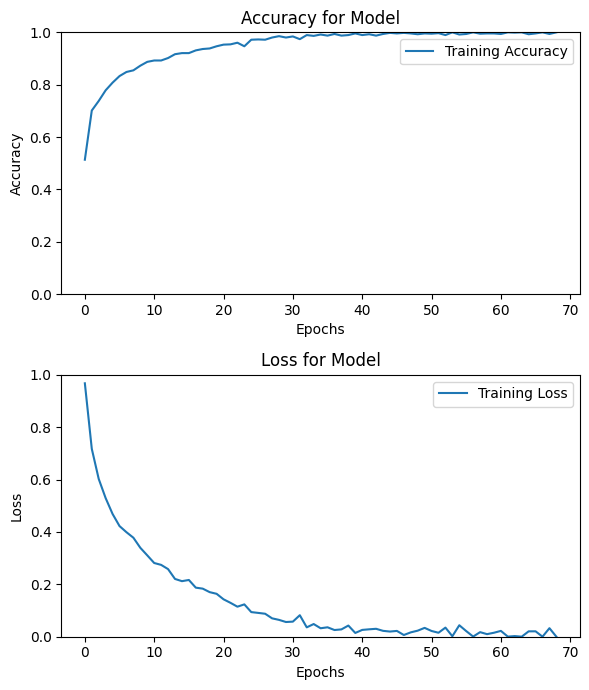

In [ ]:
plot_history(history, "Model")

## Peek into what the model is predicting

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def peek_predictions(model, dataset, num_images=5):
    images, labels = dataset[0]
    for i in range(len(images)):
        x = images[i]
        plt.figure()
        plt.imshow(x)
        plt.show()
        print('Ground truth:', labels[i]) # add name of label
        x = np.expand_dims(x, axis=0)
        p = model.predict(x, verbose=0)
        print(f'Prediction: {p.argmax()} {p}')
        print(dataset.class_indices)
        if i == num_images: break

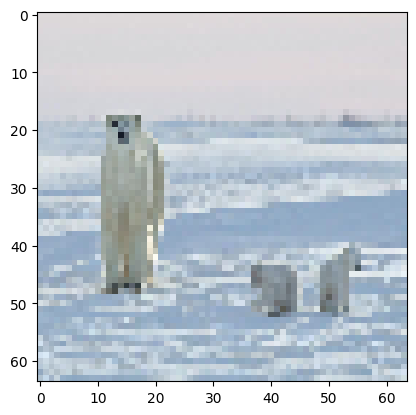

Ground truth: [0. 0. 1.]
Prediction: 2 [[1.0938949e-15 1.5809620e-17 1.0000000e+00]]
{'grizzly': 0, 'panda': 1, 'polar': 2}


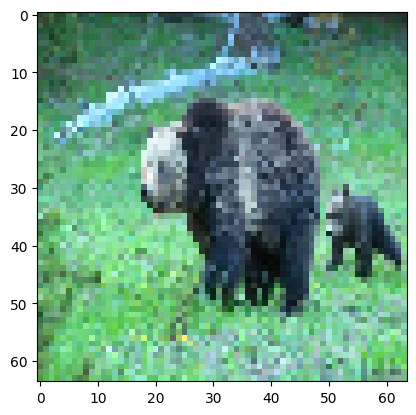

Ground truth: [1. 0. 0.]
Prediction: 0 [[9.9983478e-01 1.5959555e-04 5.6086687e-06]]
{'grizzly': 0, 'panda': 1, 'polar': 2}


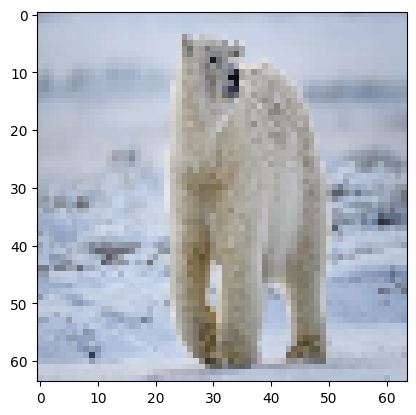

Ground truth: [0. 0. 1.]
Prediction: 2 [[1.2027762e-13 6.4083183e-16 1.0000000e+00]]
{'grizzly': 0, 'panda': 1, 'polar': 2}


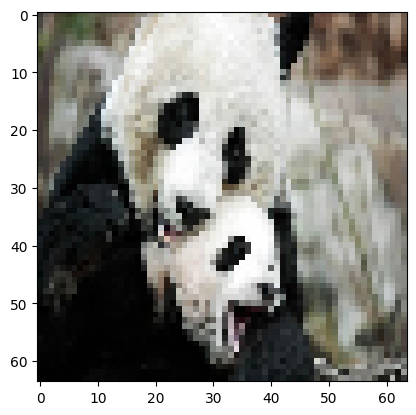

Ground truth: [0. 1. 0.]
Prediction: 1 [[9.9285450e-15 1.0000000e+00 4.8065714e-12]]
{'grizzly': 0, 'panda': 1, 'polar': 2}


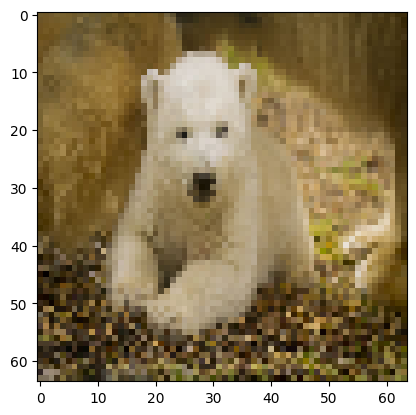

Ground truth: [0. 0. 1.]
Prediction: 2 [[9.9500562e-07 1.3871326e-08 9.9999905e-01]]
{'grizzly': 0, 'panda': 1, 'polar': 2}


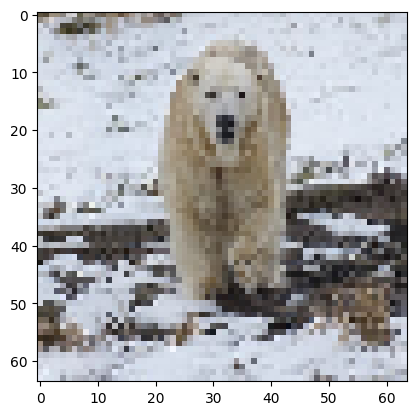

Ground truth: [0. 0. 1.]
Prediction: 2 [[8.9327270e-12 3.3166257e-15 1.0000000e+00]]
{'grizzly': 0, 'panda': 1, 'polar': 2}


In [ ]:
peek_predictions(model, train, 5)

# Use output labels as input

## Prepare the images

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Rescale all images by 1./255
my_generator = ImageDataGenerator(rescale=1./255)

In [ ]:
train2 = my_generator.flow_from_directory( "/content/bears/combined", \
                                         target_size=(64,64), shuffle=True, \
                                          batch_size=1)

Found 958 images belonging to 3 classes.


In [ ]:
print(f'{train2.class_indices=}')
print(f'{train2.num_classes=}')
print(f'{train2.batch_size=}')
print(f'{train2.samples=}')
print(f'{train2.image_shape=}')

train2.class_indices={'grizzly': 0, 'panda': 1, 'polar': 2}
train2.num_classes=3
train2.batch_size=1
train2.samples=958
train2.image_shape=(64, 64, 3)


Display one image and its label

(1, 64, 64, 3)


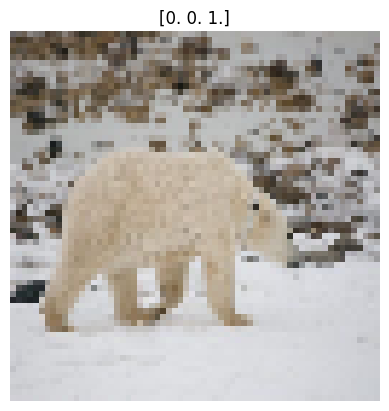

In [ ]:
display_image(train2)

In [ ]:
def convert_to_single_label(lab):
    new_lab = []
    for i in range(len(lab)):
        if lab[i][0] == 1:
            new_lab.append(0)
        elif lab[i][1] == 1:
            new_lab.append(.5)
        else:
            new_lab.append(1)
    return new_lab

In [ ]:
# Use output labels as additional input channel
import numpy as np
num_tr_samples = train2.samples
batch_size = train2.batch_size
num_batches = num_tr_samples // batch_size
img_size = train2.image_shape[0]
channels = train2.image_shape[-1]
classes = train2.num_classes
generator = train2
# Empty placeholders for RGB images and their labels
xtrain_labeled_input = np.zeros((num_tr_samples, img_size, img_size, channels + classes)) # additional channels for labels (one per class)
xtrain_labels = np.zeros((num_tr_samples, classes))

# Read everything from your generator, and fill up the mydatax/mydatay arrays
for i in range(num_tr_samples):
    img, label = generator.next()
    print(f"Image {i} shape: {img.shape=}")
    print(f"Label {i} shape: {label.shape=} {label}")
    # if y is one-hot encoded, you may need to convert y to a single value
    xtrain_labeled_input[i, :, :, :3 ] = img # Existing image in the first three channels
    xtrain_labeled_input[i, :, :, 3: ] = label # Label value as the last channel
    xtrain_labels[i] = label

Image 0 shape: img.shape=(1, 64, 64, 3)
Label 0 shape: label.shape=(1, 3) [[0. 0. 1.]]
Image 1 shape: img.shape=(1, 64, 64, 3)
Label 1 shape: label.shape=(1, 3) [[0. 1. 0.]]
Image 2 shape: img.shape=(1, 64, 64, 3)
Label 2 shape: label.shape=(1, 3) [[1. 0. 0.]]
Image 3 shape: img.shape=(1, 64, 64, 3)
Label 3 shape: label.shape=(1, 3) [[1. 0. 0.]]
Image 4 shape: img.shape=(1, 64, 64, 3)
Label 4 shape: label.shape=(1, 3) [[0. 0. 1.]]
Image 5 shape: img.shape=(1, 64, 64, 3)
Label 5 shape: label.shape=(1, 3) [[0. 1. 0.]]
Image 6 shape: img.shape=(1, 64, 64, 3)
Label 6 shape: label.shape=(1, 3) [[1. 0. 0.]]
Image 7 shape: img.shape=(1, 64, 64, 3)
Label 7 shape: label.shape=(1, 3) [[0. 0. 1.]]
Image 8 shape: img.shape=(1, 64, 64, 3)
Label 8 shape: label.shape=(1, 3) [[0. 1. 0.]]
Image 9 shape: img.shape=(1, 64, 64, 3)
Label 9 shape: label.shape=(1, 3) [[0. 0. 1.]]
Image 10 shape: img.shape=(1, 64, 64, 3)
Label 10 shape: label.shape=(1, 3) [[0. 1. 0.]]
Image 11 shape: img.shape=(1, 64, 64, 3)


In [ ]:
xtrain_labeled_input.shape
#xtrain_labels.shape
#xtrain_labeled_input[930]
#xtrain_labels[500]
xtrain_labeled_input

array([[[[0.3137255 , 0.45098042, 0.57647061, 0.        , 0.        ,
          1.        ],
         [0.3019608 , 0.43921572, 0.56470591, 0.        , 0.        ,
          1.        ],
         [0.35294119, 0.49019611, 0.6156863 , 0.        , 0.        ,
          1.        ],
         ...,
         [0.36470589, 0.49411768, 0.6156863 , 0.        , 0.        ,
          1.        ],
         [0.3137255 , 0.45098042, 0.57647061, 0.        , 0.        ,
          1.        ],
         [0.34509805, 0.48627454, 0.61960787, 0.        , 0.        ,
          1.        ]],

        [[0.36078432, 0.49019611, 0.61960787, 0.        , 0.        ,
          1.        ],
         [0.34509805, 0.47450984, 0.60392159, 0.        , 0.        ,
          1.        ],
         [0.35686275, 0.48627454, 0.6156863 , 0.        , 0.        ,
          1.        ],
         ...,
         [0.20392159, 0.33333334, 0.45490199, 0.        , 0.        ,
          1.        ],
         [0.29803923, 0.43529415, 0.5607

In [ ]:
from tensorflow.keras import datasets, layers, models
num_filters = [64, 32, 16]
filter_shape = (3, 3)
inputshape = xtrain_labeled_input.shape[1:]
pad = 'valid'
pool = (4, 4)


# convolutional base
model2 = models.Sequential()
model2.add(layers.Conv2D(num_filters[0], kernel_size=filter_shape, activation='relu', padding=pad, input_shape=inputshape, name="first_layer_conv"))
model2.add(layers.MaxPooling2D(pool_size=pool, padding=pad, name="first_layer_pool"))

model2.add(layers.Conv2D(num_filters[1], kernel_size=filter_shape, activation='relu', padding=pad))
model2.add(layers.MaxPooling2D(pool_size=pool, padding=pad))

model2.add(layers.Conv2D(num_filters[2], kernel_size=filter_shape, activation='relu', padding=pad))

# add dense layers on top
model2.add(layers.Flatten())
model2.add(layers.Dense(10, activation='relu'))
model2.add(layers.Dense(3, activation='softmax'))

In [ ]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_layer_conv (Conv2D)   (None, 62, 62, 64)        3520      
                                                                 
 first_layer_pool (MaxPooli  (None, 15, 15, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 1, 1, 16)          4624      
                                                                 
 flatten_2 (Flatten)         (None, 16)               

In [ ]:
model2.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint_filepath = '/content/drive/MyDrive/Colab Notebooks/tmp-models/chkpt.overfit.model2.hg5'
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath, monitor='accuracy', mode='max', save_best_only=True)

early_stop_callback = EarlyStopping(monitor="accuracy", patience=20, verbose=1)


In [ ]:
history2 = model2.fit(x=xtrain_labeled_input, y=xtrain_labels, batch_size=16, epochs=200, callbacks=[checkpoint_callback, early_stop_callback], verbose=1)

Epoch 1/200
60/60 [==============================] - 2s 17ms/step - loss: 0.2196 - accuracy: 0.9363
Epoch 2/200
60/60 [==============================] - 1s 16ms/step - loss: 2.7560e-04 - accuracy: 1.0000
Epoch 3/200
60/60 [==============================] - 0s 4ms/step - loss: 1.7811e-05 - accuracy: 1.0000
Epoch 4/200
60/60 [==============================] - 0s 4ms/step - loss: 5.7114e-06 - accuracy: 1.0000
Epoch 5/200
60/60 [==============================] - 0s 4ms/step - loss: 3.3457e-06 - accuracy: 1.0000
Epoch 6/200
60/60 [==============================] - 0s 4ms/step - loss: 2.3726e-06 - accuracy: 1.0000
Epoch 7/200
60/60 [==============================] - 0s 4ms/step - loss: 1.8341e-06 - accuracy: 1.0000
Epoch 8/200
60/60 [==============================] - 0s 4ms/step - loss: 1.4955e-06 - accuracy: 1.0000
Epoch 9/200
60/60 [==============================] - 0s 4ms/step - loss: 1.2624e-06 - accuracy: 1.0000
Epoch 10/200
60/60 [==============================] - 0s 4ms/step - loss: 1

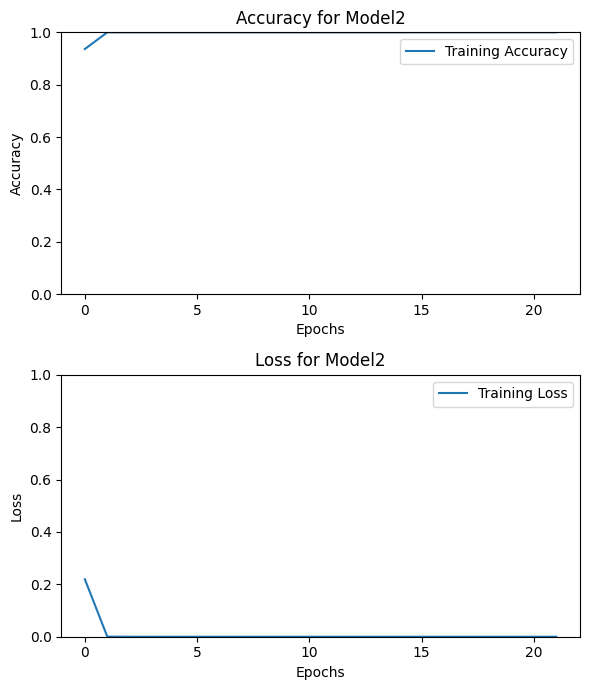

In [ ]:
plot_history(history2, "Model2")